In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
warnings.filterwarnings("ignore")
%matplotlib inline

In [8]:
data = pd.read_csv('SDFC.csv')
data.head()

,TRANDATE,Freq,Month,DayofWeek,Hour,Semester,NumSchoolWeek,IsHolidays,IsVacations,IsOpen,PrevFreq,LenStay,PrevFreq2,IsEvent,IsFinal,Year,Date
0,6/12/2012 19:00,214,12,Thursday,19,Fall,16,0,0,1,248,59.979487,225,0,0,2012,6
1,6/12/2012 20:00,195,12,Thursday,20,Fall,16,0,0,1,214,55.733333,248,0,0,2012,6
2,6/12/2012 21:00,162,12,Thursday,21,Fall,16,0,0,1,195,68.239130,214,0,0,2012,6
3,6/12/2012 22:00,48,12,Thursday,22,Fall,16,0,0,1,162,62.869565,195,0,0,2012,6
4,6/12/2012 23:00,2,12,Thursday,23,Fall,16,0,0,1,48,47.000000,162,0,0,2012,6


In [10]:
data['Semester'].fillna('Fall' , inplace = True)

In [11]:
data.head(10)

,TRANDATE,Freq,Month,DayofWeek,Hour,Semester,NumSchoolWeek,IsHolidays,IsVacations,IsOpen,PrevFreq,LenStay,PrevFreq2,IsEvent,IsFinal,Year,Date
0,6/12/2012 19:00,214,12,Thursday,19,Fall,16,0,0,1,248,59.979487,225,0,0,2012,6
1,6/12/2012 20:00,195,12,Thursday,20,Fall,16,0,0,1,214,55.733333,248,0,0,2012,6
2,6/12/2012 21:00,162,12,Thursday,21,Fall,16,0,0,1,195,68.239130,214,0,0,2012,6
3,6/12/2012 22:00,48,12,Thursday,22,Fall,16,0,0,1,162,62.869565,195,0,0,2012,6
4,6/12/2012 23:00,2,12,Thursday,23,Fall,16,0,0,1,48,47.000000,162,0,0,2012,6
5,7/12/2012 0:00,0,12,Friday,0,Fall,16,1,0,0,2,0.000000,48,0,0,2012,7
6,7/12/2012 1:00,0,12,Friday,1,Fall,16,0,0,0,0,0.000000,2,0,0,2012,7
7,7/12/2012 2:00,0,12,Friday,2,Fall,16,0,0,0,0,0.000000,0,0,0,2012,7
8,7/12/2012 3:00,0,12,Friday,3,Fall,16,0,1,0,0,0.000000,0,0,0,2012,7
9,7/12/2012 4:00,0,12,Friday,4,Fall,16,0,0,0,0,0.000000,0,0,0,2012,7


# Visulization of data



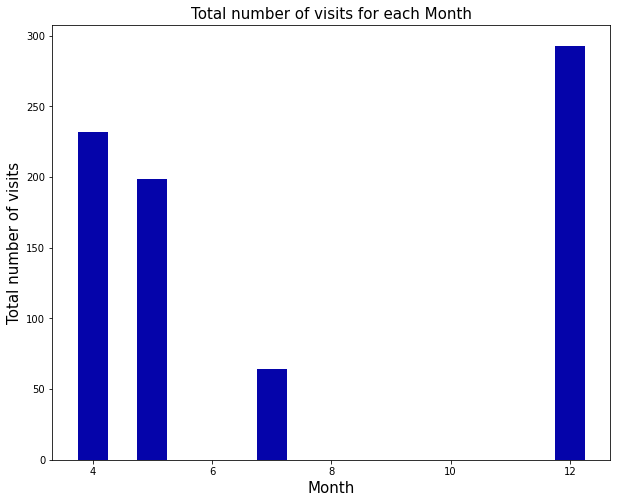

In [12]:
plt.figure(figsize=[10,8])
plt.bar(data['Month'],data['Freq'], width = 0.5, color='#0504aa')
plt.xlabel('Month',fontsize=15)
plt.ylabel('Total number of visits',fontsize=15)
plt.title('Total number of visits for each Month',fontsize=15)
plt.show()

In [6]:
df = pd.DataFrame({'count' : data.groupby( ['Semester', 'NumSchoolWeek','Freq'] ).size()}).sort_values(ascending=False,by = 'Semester').reset_index()

In [7]:
df

,Semester,NumSchoolWeek,Freq,count
0,Summer,12,64,1
1,Summer,12,32,1
2,Summer,12,0,11
3,Summer,12,1,2
4,Summer,12,28,1
...,...,...,...,...
154,Fall,16,98,1
155,Fall,16,94,1
156,Fall,16,92,1
157,Fall,16,85,1


In [8]:
sem_fall, sem_spring, sem_summer = [] ,[],[]
for i in range(0,10130 ):
    if df['Semester'][i] == 'Fall':
        sem_fall.append(df['Freq'][i])
    if df['Semester'][i] == 'Spring':
        sem_spring.append(df['Freq'][i])
    if df['Semester'][i] == 'Summer':
        sem_summer.append(df['Freq'][i])

In [9]:
no_of_schoolweek_fall = df['NumSchoolWeek'].iloc[5658:10130].tolist()
no_of_schoolweek_spring = df['NumSchoolWeek'].iloc[1576:5658].tolist()
no_of_schoolweek_summer = df['NumSchoolWeek'].iloc[0:1576].tolist()

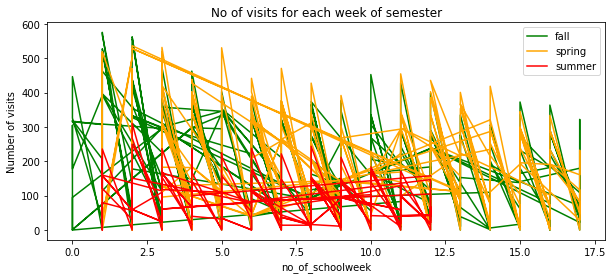

In [79]:
plt.figure(figsize=[10,4])
fall = plt.plot(no_of_schoolweek_fall,sem_fall, color='g',label="fall")
spring = plt.plot(no_of_schoolweek_spring,sem_spring, color='orange',label="spring")
summer = plt.plot(no_of_schoolweek_summer,sem_summer, color='red',label="summer")
plt.xlabel('no_of_schoolweek')
plt.ylabel('Number of visits')
plt.title('No of visits for each week of semester')
plt.legend( loc='upper right')
plt.show()

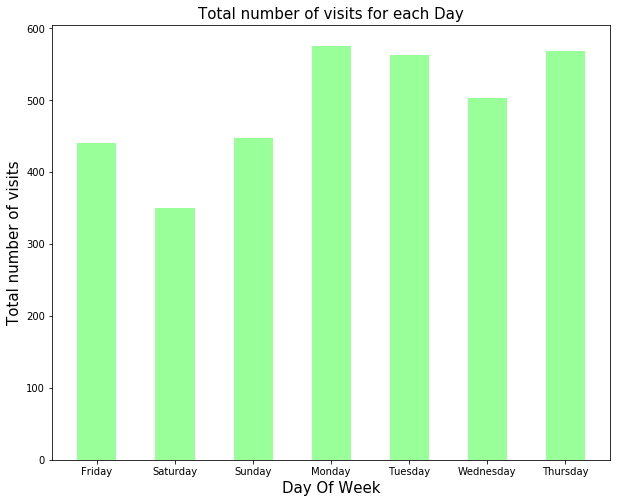

In [11]:
plt.figure(figsize=[10,8])

plt.bar(data['DayofWeek'],data['Freq'], width = 0.5, color='#99ff99')
plt.xlabel('Day Of Week',fontsize=15)
plt.ylabel('Total number of visits',fontsize=15)
plt.title('Total number of visits for each Day',fontsize=15)
plt.show()

In [12]:
x = data['LenStay'].tolist()
y = data['Hour'].tolist()

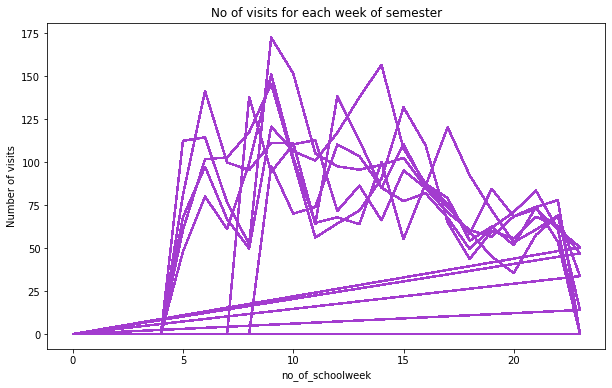

In [16]:
plt.figure(figsize=[10,6])
plt.plot(y,x, color='#a33ccf')
plt.xlabel('no_of_schoolweek')
plt.ylabel('Number of visits')
plt.title('No of visits for each week of semester')
plt.show()

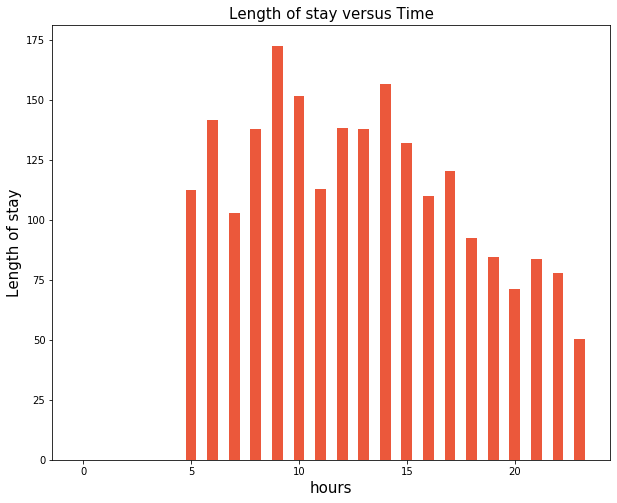

In [15]:
plt.figure(figsize=[10,8])

plt.bar(data['Hour'],data['LenStay'], width = 0.5, color='#eb583b')
plt.xlabel('hours',fontsize=15)
plt.ylabel('Length of stay',fontsize=15)
plt.title('Length of stay versus Time',fontsize=15)
plt.show()

# Prediction

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['DayofWeek'] = le.fit_transform(data['DayofWeek'])
data['Semester'] = le.fit_transform(data['Semester'])

In [18]:
y = data['Freq'].values
X = data[['PrevFreq','PrevFreq2','LenStay','Hour','IsOpen','NumSchoolWeek','Date','Month','Semester','DayofWeek']]


In [19]:
X

,PrevFreq,PrevFreq2,LenStay,Hour,IsOpen,NumSchoolWeek,Date,Month,Semester,DayofWeek
0,0,0,68.000000,5,1,0,17,8,0,0
1,32,0,97.424658,6,1,0,17,8,0,0
2,36,32,66.923611,7,1,0,17,8,0,0
3,65,36,49.882883,8,1,0,17,8,0,0
4,76,65,120.717391,9,1,0,17,8,0,0
...,...,...,...,...,...,...,...,...,...,...
39590,302,286,71.989848,19,0,7,21,2,1,5
39591,353,302,53.439560,20,0,7,21,2,1,5
39592,347,353,60.750000,21,0,7,21,2,1,5
39593,213,347,69.076923,22,0,7,21,2,1,5


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [51]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2  
y = data['Freq'].values
X = data[['PrevFreq','PrevFreq2','LenStay','Hour','IsOpen','NumSchoolWeek','Date','Month','Semester','DayofWeek']]
# X = data.drop(['Freq','TRANDATE'], axis = 1)
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

           Specs         Score
0       PrevFreq  3.573822e+06
1      PrevFreq2  2.685980e+06
2        LenStay  6.720564e+05
3           Hour  4.442583e+04
4         IsOpen  1.112513e+04
5  NumSchoolWeek  5.975999e+03
6           Date  2.882564e+03
7          Month  2.537647e+03
8       Semester  2.524418e+03
9      DayofWeek  1.174306e+03


# Random Forest

In [37]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators = 20, max_depth = 10)
reg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [38]:
y_pred = classifier.predict(X_test)
y_pred

array([127.43843841,  36.55249552,   6.454173  , ...,   7.38950528,
       109.724896  ,   1.94487611])

In [39]:
from sklearn.metrics import r2_score
print('Acc :',r2_score(y_test,y_pred))

Acc : 0.8615710372571477


# Decision Tree

In [43]:
from sklearn.tree import DecisionTreeRegressor
classifier = DecisionTreeRegressor()
classifier.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [44]:
y_pred = classifier.predict(X_test)
y_pred

array([100.,  73.,   0., ...,   0.,  90.,   0.])

In [45]:
from sklearn.metrics import r2_score
print('Acc :',r2_score(y_test,y_pred))

Acc : 0.9099952830694422


# ARIMA

In [57]:
arima = data[['TRANDATE','Freq']]

In [59]:
total_size=len(arima)
train_size=math.floor(0.7*total_size)
train=arima.head(train_size)
test=arima.tail(len(arima) -train_size)

In [62]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train.Freq, order=(3, 0, 1))
fit1 = model.fit(disp=False)
y_hat = test.copy()
y_hat['ARIMA'] = fit1.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

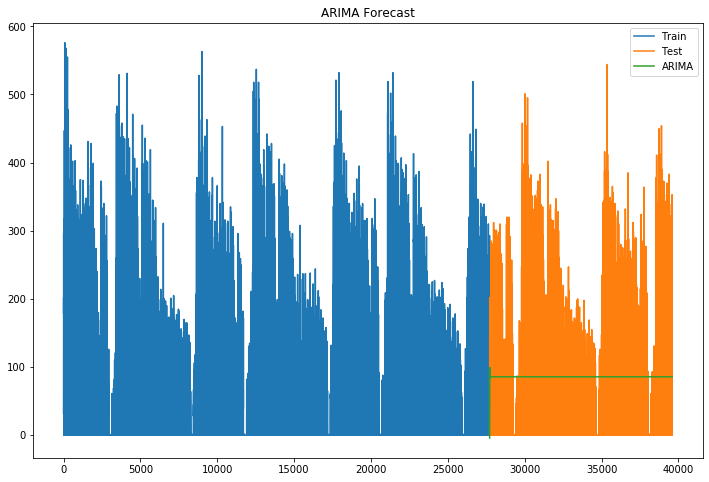

In [63]:
#Plotting data
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Freq'], label='Train')
plt.plot(test.index,test['Freq'], label='Test')
plt.plot(y_hat.index,y_hat['ARIMA'], label='ARIMA')
plt.legend(loc='best')
plt.title("ARIMA Forecast")
plt.show()

In [65]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Freq, y_hat.ARIMA))
print('RMSE = '+str(rms))

RMSE = 88.94452125918774


# Seasonal Navie

In [67]:
total_size=len(arima)
train_size=math.floor(0.7*total_size) 
train=arima.head(train_size)
test=arima.tail(len(arima) -train_size)
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27716 entries, 0 to 27715
Data columns (total 2 columns):
TRANDATE    27716 non-null object
Freq        27716 non-null int64
dtypes: int64(1), object(1)
memory usage: 433.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11879 entries, 27716 to 39594
Data columns (total 2 columns):
TRANDATE    11879 non-null object
Freq        11879 non-null int64
dtypes: int64(1), object(1)
memory usage: 185.7+ KB


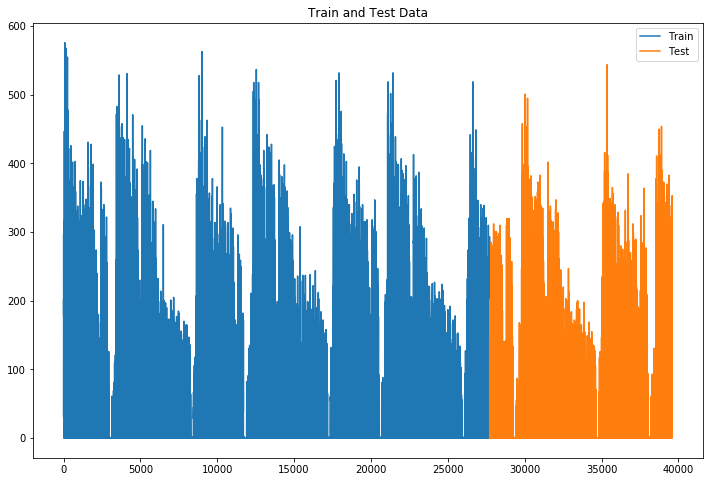

In [78]:
#Plotting data
plt.figure(figsize=(12,8))
plt.title("Train and Test Data")
plt.plot(train.index, train['Freq'], label='Train')
plt.plot(test.index,test['Freq'], label='Test')
plt.legend(loc='best')
plt.show()

In [70]:
dd = np.asarray(train.Freq)
lastvalue = dd[len(dd)-1]
y_hat = test.copy()
y_hat['naive'] = lastvalue
y_hat.describe()

,Freq,naive
count,11879.000000,11879.0
mean,80.008502,0.0
std,88.789650,0.0
min,0.000000,0.0
25%,0.000000,0.0
50%,56.000000,0.0
75%,131.000000,0.0
max,544.000000,0.0


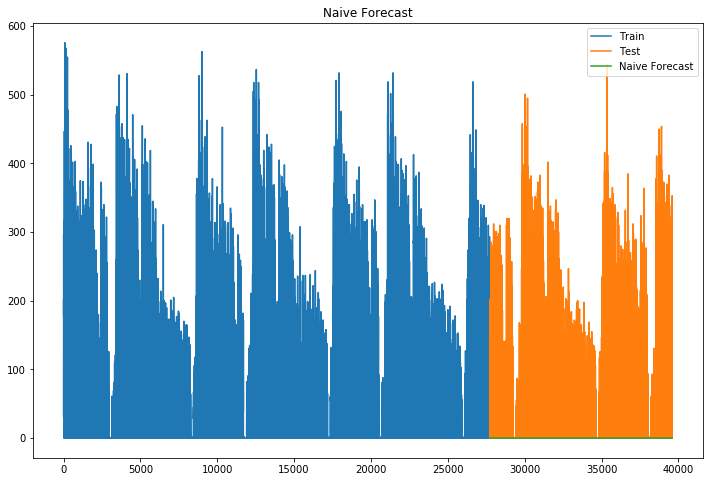

In [73]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Freq'], label='Train')
plt.plot(test.index,test['Freq'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [77]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Freq, y_hat.naive))
print(rms)

119.51693922838761
